# Image Segmentation: DeepCell

This notebook depends on a PalmettoBUG directory already having been set up in the appropriate location!

Key assumptions:

    1). Images in an images/img folder of the project_directory

    2). a panel.csv file in the project_directory (with the same settings as in the PalmettoBUG docs, if you want replication)

In [1]:
import os
import numpy as np
import tifffile as tf
import isosegdenoise as iSD

### CHANGE The following directory to match an existing directory on your computer if you are testing this tutorial on your own machine!

In [2]:
my_computer_path =  "C:/Users/Default/Desktop"  ## CHANGE This DIRECTORY to match an existing directory on your computer if you testing this tutorial on your own machine!
project_directory = my_computer_path + "/Example_IMC"

## Now do DeepCell Segmentation 

Here we load the project directory in iSD's ImageAnalysis class, then perform deepcell segmentation.

To perform deepcell segmentation, we must:

    1). the images we what to segment (image_source_directory) -- this is typically the project's /images/img folder, unless additional image denoising / processing has been applied.
        It is also trivial to process the images outisde of palmettobug entirely, and then pass in those images to this function, as long as the order & number of channels remains the
        same inside the .tiff file.
    
    2). the names of the image(s) from that folder to segment. Can be ['ALL'] to segment all images in the folder, or can be a list of individual files in the folder.
    
    3). where we want the segmentation masks to be written (mask_output_directory), this is the /masks/deepcell folder in the GUI and this example. However, there is no restriction
        on where the output files can be written, so long as the destination folder can be created with os.mkdir(mask_output_directory). 

In [3]:
## initialize denoise / esgmentation ImageAnalysis:
seg_ImageAnalysis = iSD.imc_entrypoint(directory = project_directory, resolutions = [1.0, 1.0], from_mcds = True)

In [4]:
'''
Select Deepcell segmentation parameters
'''
image_source_directory = seg_ImageAnalysis.directory_object.img_dir + "/img"   
image_list = 'ALL'    ## either takes ['ALL'] (default) to segment all images, or a list of images (such as from os.listdir()), and will segment the first as a test

mask_output_directory = seg_ImageAnalysis.directory_object.masks_dir + "/deepcell"

re_do = True           ## If set to False (default), will skip already segmented images (will not overwrite if image with same name already exists in output) 
                        ## Only used is image_list == ['All']

In [5]:
'''
Do Deepcell segmentation!
'''
seg_ImageAnalysis.deepcell_segment(image_folder = image_source_directory, 
                                   output_folder = mask_output_directory, 
                                   #image_list = image_list, 
                                   re_do = re_do,
                                  is_torch = True)  ### set is_torch to False to use the original tensorflow model of Mesmer / DeepCell

CRC_1_ROI_001 has been Segmented, with 2183 masks in it!
CRC_1_ROI_002 has been Segmented, with 7395 masks in it!
CRC_2_ROI_001 has been Segmented, with 3439 masks in it!
CRC_2_ROI_002 has been Segmented, with 1891 masks in it!
CRC_2_ROI_003 has been Segmented, with 2529 masks in it!
CRC_2_ROI_004 has been Segmented, with 1473 masks in it!
CRC_3_ROI_001 has been Segmented, with 5577 masks in it!
CRC_3_ROI_002 has been Segmented, with 5875 masks in it!
CRC_3_ROI_003 has been Segmented, with 1007 masks in it!
CRC_3_ROI_004 has been Segmented, with 4375 masks in it!


(<Figure size 988.8x604.8 with 2 Axes>,
 <Axes: >,
 <matplotlib.image.AxesImage at 0x24082ceb520>)

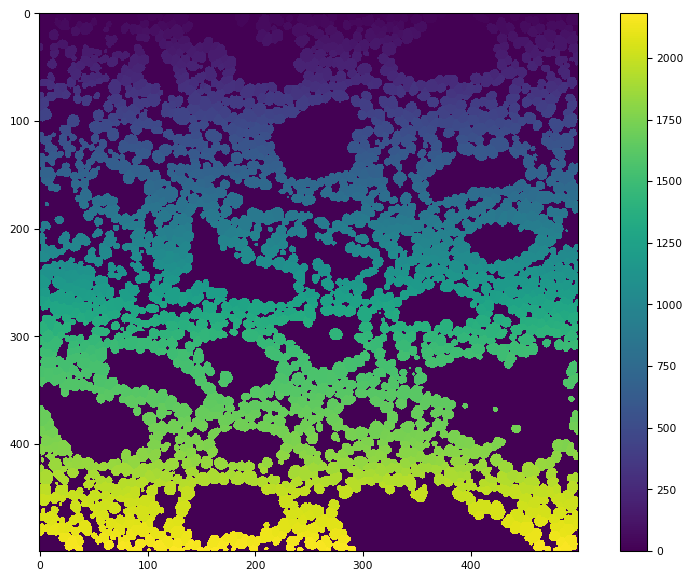

In [6]:
masks = os.listdir(seg_ImageAnalysis.directory_object.masks_dir + "/deepcell")
tf.imshow(tf.imread(mask_output_directory + "/" + masks[0]))